In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('D:\Machine learning\Data\ds_salaries.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   70000             EUR          79833                 DE             0   
1  260000             USD         260000                 JP             0   
2   85000             GBP         109024                 GB            50   
3   20000             USD          20000                 HN             0   
4  150000             USD         150000                 US            50   

  company_location company_size  
0               DE            L  
1               JP            S  
2               GB            M  
3               HN            S  
4               US            L

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [4]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count   607.000000  6.070000e+02     607.000000     607.00000
mean   2021.405272  3.240001e+05  112297.869852      70.92257
std       0.692133  1.544357e+06   70957.259411      40.70913
min    2020.000000  4.000000e+03    2859.000000       0.00000
25%    2021.000000  7.000000e+04   62726.000000      50.00000
50%    2022.000000  1.150000e+05  101570.000000     100.00000
75%    2022.000000  1.650000e+05  150000.000000     100.00000
max    2022.000000  3.040000e+07  600000.000000     100.00000

In [5]:
df.experience_level.describe()

count     607
unique      4
top        SE
freq      280
Name: experience_level, dtype: object

In [6]:
df.value_counts('experience_level')

experience_level
SE    280
MI    213
EN     88
EX     26
dtype: int64

In [7]:
df.value_counts('company_size')

company_size
M    326
L    198
S     83
dtype: int64

In [8]:
df.value_counts('employment_type')

employment_type
FT    588
PT     10
CT      5
FL      4
dtype: int64

In [9]:
df.value_counts('work_year')

work_year
2022    318
2021    217
2020     72
dtype: int64

In [10]:
df.sort_values(by = ['salary_in_usd'], ascending = False)

work_year experience_level employment_type  \
252       2021               EX              FT   
97        2021               MI              FT   
33        2020               MI              FT   
157       2021               MI              FT   
225       2021               EX              CT   
..         ...              ...             ...   
179       2021               MI              FT   
77        2021               MI              PT   
238       2021               EN              FT   
185       2021               MI              FT   
176       2021               MI              FT   

                              job_title  salary salary_currency  \
252             Principal Data Engineer  600000             USD   
97               Financial Data Analyst  450000             USD   
33                   Research Scientist  450000             USD   
157  Applied Machine Learning Scientist  423000             USD   
225            Principal Data Scientist  416000             USD   
..                                  ...     ...             ...   
179                      Data Scientist  420000             INR   
77        3D Computer Vision Researcher  400000             INR   
238                      Data Scientist    4000             USD   
185                       Data Engineer    4000             USD   
176                      Data Scientist   58000             MXN   

     salary_in_usd employee_residence  remote_ratio company_location  \
252         600000                 US           100               US   
97          450000                 US           100               US   
33          450000                 US             0               US   
157         423000                 US            50               US   
225         416000                 US           100               US   
..             ...                ...           ...              ...   
179           5679                 IN           100               US   
77            5409                 IN            50               IN   
238           4000                 VN             0               VN   
185           4000                 IR           100               IR   
176           2859                 MX             0               MX   

    company_size  
252            L  
97             L  
33             M  
157            L  
225            S  
..           ...  
179            S  
77             M  
238            M  
185            M  
176            S  

[607 rows x 11 columns]

# groupby

In [11]:
data = df.drop(['work_year', 'salary'], axis =1)
grp1 = data.groupby('experience_level')
grp1.aggregate(np.mean)

salary_in_usd  remote_ratio
experience_level                             
EN                 61643.318182     69.886364
EX                199392.038462     78.846154
MI                 87996.056338     63.849765
SE                138617.292857     75.892857

In [12]:
grp2 = data.groupby('job_title').mean()
grp2

salary_in_usd  remote_ratio
job_title                                                            
3D Computer Vision Researcher               5409.000000     50.000000
AI Scientist                               66135.571429     78.571429
Analytics Engineer                        175000.000000     50.000000
Applied Data Scientist                    175655.000000     70.000000
Applied Machine Learning Scientist        142068.750000     87.500000
BI Data Analyst                            74755.166667     66.666667
Big Data Architect                         99703.000000     50.000000
Big Data Engineer                          51974.000000     50.000000
Business Data Analyst                      76691.200000     90.000000
Cloud Data Engineer                       124647.000000     75.000000
Computer Vision Engineer                   44419.333333     58.333333
Computer Vision Software Engineer         105248.666667    100.000000
Data Analyst                               92893.061856     75.257732
Data Analytics Engineer                    64799.250000     75.000000
Data Analytics Lead                       405000.000000    100.000000
Data Analytics Manager                    127134.285714     85.714286
Data Architect                            177873.909091    100.000000
Data Engineer                             112725.000000     75.000000
Data Engineering Manager                  123227.200000     70.000000
Data Science Consultant                    69420.714286     71.428571
Data Science Engineer                      75803.333333     83.333333
Data Science Manager                      158328.500000     83.333333
Data Scientist                            108187.832168     63.986014
Data Specialist                           165000.000000    100.000000
Director of Data Engineering              156738.000000    100.000000
Director of Data Science                  195074.000000     42.857143
ETL Developer                              54957.000000      0.000000
Finance Data Analyst                       61896.000000     50.000000
Financial Data Analyst                    275000.000000     75.000000
Head of Data                              160162.600000     90.000000
Head of Data Science                      146718.750000     50.000000
Head of Machine Learning                   79039.000000     50.000000
Lead Data Analyst                          92203.000000    100.000000
Lead Data Engineer                        139724.500000     66.666667
Lead Data Scientist                       115190.000000     50.000000
Lead Machine Learning Engineer             87932.000000      0.000000
ML Engineer                               117504.000000     83.333333
Machine Learning Developer                 85860.666667     83.333333
Machine Learning Engineer                 104880.146341     67.073171
Machine Learning Infrastructure Engineer  101145.000000     50.000000
Machine Learning Manager                  117104.000000     50.000000
Machine Learning Scientist                158412.500000     68.750000
Marketing Data Analyst                     88654.000000    100.000000
NLP Engineer                               37236.000000     50.000000
Principal Data Analyst                    122500.000000    100.000000
Principal Data Engineer                   328333.333333    100.000000
Principal Data Scientist                  215242.428571     85.714286
Product Data Analyst                       13036.000000     50.000000
Research Scientist                        109019.500000     53.125000
Staff Data Scientist                      105000.000000    100.000000

In [13]:
grp3 = data.groupby('experience_level')
grp3.aggregate(np.mean)

salary_in_usd  remote_ratio
experience_level                             
EN                 61643.318182     69.886364
EX                199392.038462     78.846154
MI                 87996.056338     63.849765
SE                138617.292857     75.892857

In [14]:
grp4 = data.groupby('company_size')
grp4.aggregate(np.mean)

salary_in_usd  remote_ratio
company_size                             
L             119242.994949     68.686869
M             116905.466258     72.546012
S              77632.674699     69.879518

In [15]:
grp5 = data.groupby('employee_residence')
#employee residence
emp_re = grp5.aggregate(np.mean)
emp_re.drop(emp_re.columns[0], axis =1 )
emp_re.sort_values('salary_in_usd', ascending = False)

salary_in_usd  remote_ratio
employee_residence                             
MY                  200000.000000    100.000000
PR                  160000.000000     50.000000
US                  149194.117470     77.259036
NZ                  125000.000000     50.000000
CH                  122346.000000      0.000000
AU                  108042.666667     83.333333
RU                  105750.000000     62.500000
SG                  104176.500000     75.000000
JP                  103537.714286     50.000000
AE                  100000.000000     66.666667
DZ                  100000.000000     50.000000
JE                  100000.000000      0.000000
IQ                  100000.000000     50.000000
CA                   97085.310345     75.862069
BE                   85699.000000     75.000000
DE                   85552.560000     56.000000
GB                   81403.159091     45.454545
BG                   80000.000000    100.000000
AT                   76738.666667     16.666667
BO                   75000.000000    100.000000
IE                   71444.000000    100.000000
CZ                   69999.000000     50.000000
HK                   66022.000000     50.000000
SI                   63831.000000     75.000000
IT                   61600.000000     50.000000
NL                   60956.600000     90.000000
AR                   60000.000000    100.000000
FR                   59886.611111     55.555556
LU                   59102.000000    100.000000
ES                   57593.400000     90.000000
GR                   56331.230769     80.769231
PL                   56177.500000    100.000000
BR                   54634.666667     66.666667
RO                   51419.000000     25.000000
PH                   45760.000000    100.000000
HR                   45618.000000    100.000000
CN                   43331.000000      0.000000
PT                   42862.500000     66.666667
CL                   40038.000000    100.000000
IN                   37322.333333     63.333333
DK                   37252.500000     50.000000
HU                   35997.000000     50.000000
EE                   32974.000000    100.000000
TN                   31875.000000    100.000000
VN                   30800.000000     66.666667
NG                   30000.000000    100.000000
MT                   28369.000000     50.000000
PK                   27462.833333     66.666667
RS                   25532.000000    100.000000
CO                   21844.000000     50.000000
TR                   20096.666667     50.000000
HN                   20000.000000      0.000000
MX                   18185.000000      0.000000
MD                   18000.000000      0.000000
UA                   13400.000000    100.000000
KE                    9272.000000    100.000000
IR                    4000.000000    100.000000

In [16]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

In [17]:
df.groupby(['job_title', 'employee_residence'])['salary_in_usd'].mean()

job_title                      employee_residence
3D Computer Vision Researcher  IN                      5409.0
AI Scientist                   BR                     12000.0
                               DK                     45896.0
                               ES                     55000.0
                               IN                    109026.5
                                                       ...   
Research Scientist             JE                    100000.0
                               NL                     42000.0
                               PT                     60757.0
                               US                    238000.0
Staff Data Scientist           US                    105000.0
Name: salary_in_usd, Length: 196, dtype: float64

# visualization

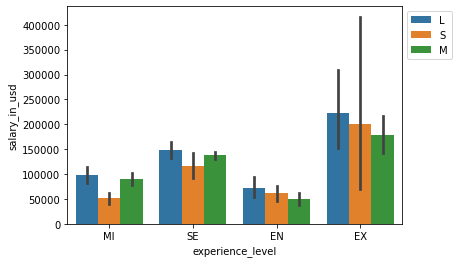

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'experience_level', y = 'salary_in_usd',
               hue = 'company_size',  data =df )
plt.legend(bbox_to_anchor = (1,1), loc = 2)
plt.show()


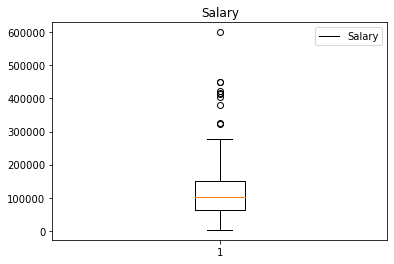

In [19]:
plt.boxplot(df['salary_in_usd'])
plt.title('Salary')
plt.legend(['Salary'])

Old shape : (607, 11)
New shape : (597, 11)


<AxesSubplot:xlabel='salary_in_usd'>

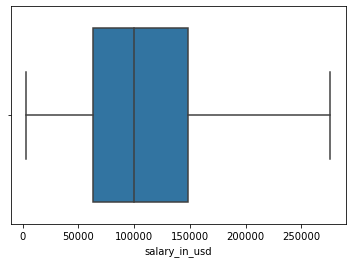

In [20]:
q1 = np.percentile(df['salary_in_usd'], 25, interpolation = 'midpoint')

q3 = np.percentile(df['salary_in_usd'], 75, interpolation = 'midpoint')
 
iqr = q3 - q1 

print('Old shape :', df.shape)


upper = np.where(df['salary_in_usd'] >= (q3+1.5*iqr))

lower = np.where(df['salary_in_usd'] <= (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print('New shape :', df.shape)

sns.boxplot(x = 'salary_in_usd', data = df)

salary_in_usd  remote_ratio
salary_in_usd       1.000000      0.132122
remote_ratio        0.132122      1.000000

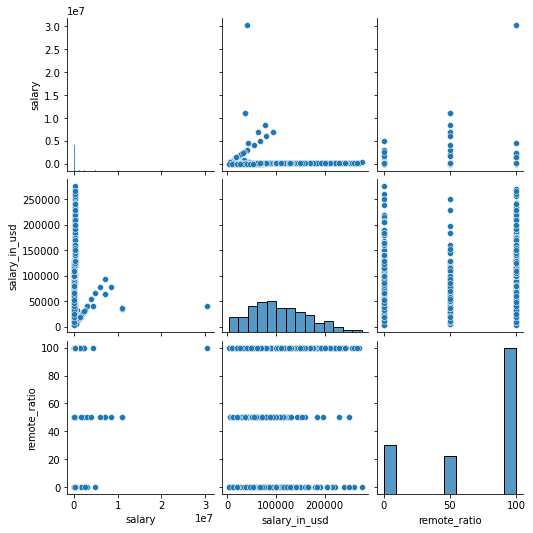

In [24]:
sns.pairplot(df.drop('work_year', axis =1 ))

data.corr(method = 'pearson')



<AxesSubplot:>

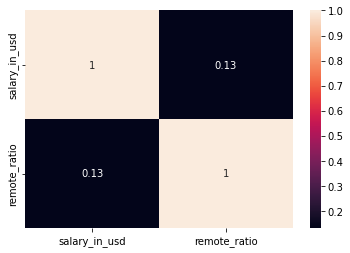

In [23]:
sns.heatmap(data.corr(method = 'pearson'), annot = True)
#annot = True shows each param's correlation number in its rectangle